## DEI Dataset

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel('Denominator_230519_Berryl_S&P500.xlsx')
df.head()

,Name,DEI ID number,ISIN - 1000 values,Legal Entity Identifier,Location Country,Primary Sector,Primary Industry,Advanced Total (2023),Board Total (2023),Executive Total (2023),...,% hispanic executives - calculated - Country - Median (2021),% hispanic executives - calculated - Country - Average (2021),% caucasian executives - calculated - Country - First Quartile (2021),% caucasian executives - calculated - Country - Fourth Quartile (2021),% caucasian executives - calculated - Country - Median (2021),% caucasian executives - calculated - Country - Average (2021),% indigenous executives - calculated - Country - First Quartile (2021),% indigenous executives - calculated - Country - Fourth Quartile (2021),% indigenous executives - calculated - Country - Median (2021),% indigenous executives - calculated - Country - Average (2021)
0,3M COMPANY,1345634,"US88579EAD76, US88579EAS46, US88579EAU91, US88...",LUZQVYP4VS22CLWDAR65,United States,BUSINESS/CONSUMER SERVICES,BUSINESS/CONSUMER SERVICES - Business/Manageme...,56.19,60.94,43.32,...,0.0,1.12,80.00,100.0,90.91,87.01,0.0,0.0,0.0,0.05
1,A. O. SMITH CORPORATION,648856,"US8318652091, US8318654071",549300XG4US7UJNECY36,United States,REAL ESTATE/CONSTRUCTION,REAL ESTATE/CONSTRUCTION - Building Materials/...,50.97,53.59,40.61,...,0.0,1.12,80.00,100.0,90.91,87.01,0.0,0.0,0.0,0.05
2,ABBOTT LABORATORIES,1539971,"US00763MAF59, US00763MAG33, US00763MAH16, US00...",HQD377W2YR662HK5JX27,United States,HEALTH CARE/LIFE SCIENCES,HEALTH CARE/LIFE SCIENCES - Pharmaceuticals,60.22,67.11,50.74,...,0.0,1.12,80.00,100.0,90.91,87.01,0.0,0.0,0.0,0.05
3,ABBVIE INC.,1547048,"US00287YAL39, US00287YAM12, US00287YAN94, US00...",FR5LCKFTG8054YNNRU85,United States,HEALTH CARE/LIFE SCIENCES,HEALTH CARE/LIFE SCIENCES - Biotechnology,62.75,55.24,67.52,...,0.0,1.12,80.00,100.0,90.91,87.01,0.0,0.0,0.0,0.05
4,Accenture PLC,1741869,IE00B4BNMY34,549300JY6CF6DO4YFQ03,Gibraltar,BUSINESS/CONSUMER SERVICES,BUSINESS/CONSUMER SERVICES - Business/Manageme...,53.67,55.31,49.94,...,0.0,0.15,91.67,100.0,100.00,93.91,0.0,0.0,0.0,0.00


In [58]:
df.shape

(501, 424)

In [6]:
df.columns

Index(['Name', 'DEI ID number', 'ISIN - 1000 values',
       'Legal Entity Identifier', 'Location Country', 'Primary Sector',
       'Primary Industry', 'Advanced Total (2023)', 'Board Total (2023)',
       'Executive Total (2023)',
       ...
       '% hispanic executives - calculated - Country - Median (2021)',
       '% hispanic executives - calculated - Country - Average (2021)',
       '% caucasian executives - calculated - Country - First Quartile (2021)',
       '% caucasian executives - calculated - Country - Fourth Quartile (2021)',
       '% caucasian executives - calculated - Country - Median (2021)',
       '% caucasian executives - calculated - Country - Average (2021)',
       '% indigenous executives - calculated - Country - First Quartile (2021)',
       '% indigenous executives - calculated - Country - Fourth Quartile (2021)',
       '% indigenous executives - calculated - Country - Median (2021)',
       '% indigenous executives - calculated - Country - Average (2021)

## 1. Analyze Data in 2023

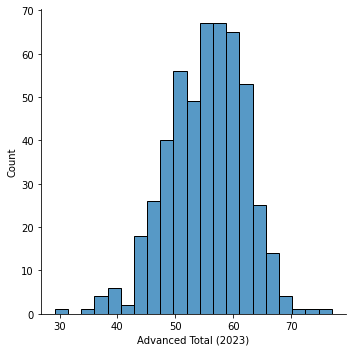

In [17]:
#Visualize total DEI score based on all DEI dimensions 
#across executive, board, and company level performance in 2023
sns.displot(df['Advanced Total (2023)'])

In [159]:
df['Advanced Total (2023)'].mean()

55.34804391217563

THe total DEI score based on all DEI dimensions across executive, board, and company level performance in 2023 is **slightly skewed to the left**. The mean is about 55.

array([[<AxesSubplot:title={'center':'Advanced Total Gender (2023)'}>,
        <AxesSubplot:title={'center':'Advanced Total Race/Ethnicity (2023)'}>],
       [<AxesSubplot:title={'center':'Advanced Total Education (2023)'}>,
        <AxesSubplot:title={'center':'Advanced Total Sexuality (2023)'}>],
       [<AxesSubplot:title={'center':'Advanced Total Age (2023)'}>,
        <AxesSubplot:>]], dtype=object)

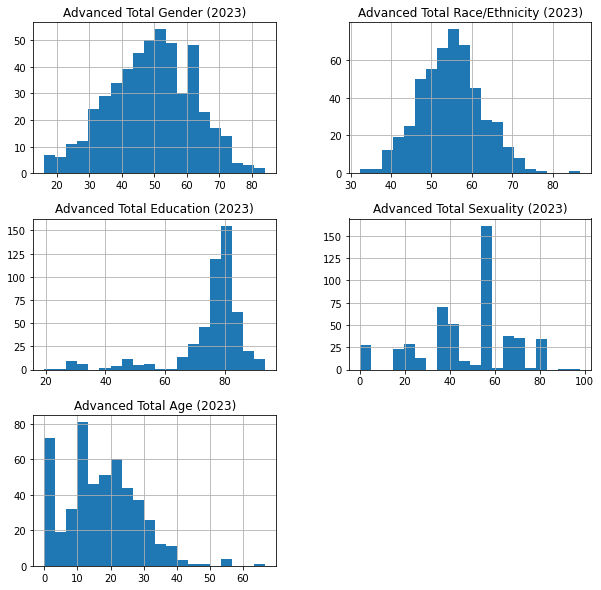

In [45]:
#Visualize total Gender, Race/Ethnicity, Education, Sexuality, Age score 
#across the board, executive, and company-levels in 2023
DEI_dimensions = ['Advanced Total Gender (2023)','Advanced Total Race/Ethnicity (2023)',
                  'Advanced Total Education (2023)','Advanced Total Sexuality (2023)','Advanced Total Age (2023)']
df[DEI_dimensions].hist(bins=20, figsize=(10, 10))

The graphs above show the distributions of total score of different dimensions in 2023. The distribution of total gender and total race/ethnicity is **almost normal**. The distribution of total education and total sexuality is skewed to the left. The distribution of total age is skewed to the right. 

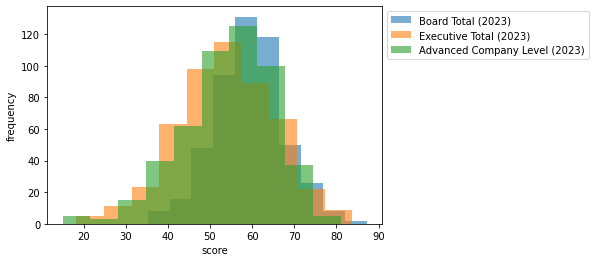

In [93]:
#Compare DEI score based on all DEI dimensions among board, executive, and company-levels in 2023
plt.xlabel('score')
plt.ylabel('frequency')
plt.hist(df['Board Total (2023)'],alpha = 0.6, label = "Board Total (2023)")
plt.hist(df['Executive Total (2023)'],alpha = 0.6, label = "Executive Total (2023)")
plt.hist(df['Advanced Company Level (2023)'],alpha = 0.6, label = "Advanced Company Level (2023)") 
plt.legend(bbox_to_anchor=(1, 1))

The distributions of DEI scores of board, executive, and company-levels are **overlapping in most parts**.

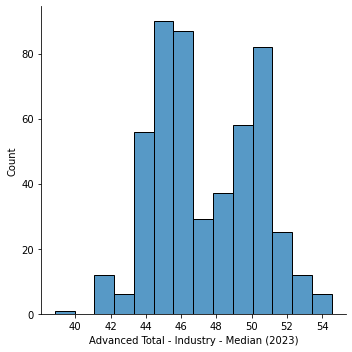

In [41]:
sns.displot(df['Advanced Total - Industry - Median (2023)'])

In [51]:
#Compare DEI score based on all DEI dimensions among all primary sectors
total_score = ['Advanced Total (2023)','Board Total (2023)','Executive Total (2023)','Advanced Company Level (2023)']
sector_score = df.groupby(['Primary Sector'])[total_score].median()
sector_score

,Advanced Total (2023),Board Total (2023),Executive Total (2023),Advanced Company Level (2023)
Primary Sector,,,,
AUTOMOTIVE,53.950,56.840,48.390,55.280
BASIC MATERIALS/RESOURCES,56.305,59.365,57.040,55.675
BUSINESS/CONSUMER SERVICES,54.755,56.690,52.140,54.865
CONSUMER GOODS,58.830,59.850,57.650,60.530
ENERGY,51.800,56.320,51.100,50.800
FINANCIAL SERVICES,57.470,59.610,54.920,58.260
HEALTH CARE/LIFE SCIENCES,55.920,59.480,55.640,54.380
INDUSTRIAL GOODS,54.175,59.585,51.345,54.130
LEISURE/HOSPITALITY,54.135,64.130,44.905,53.865


In [52]:
sector_score.describe()

,Advanced Total (2023),Board Total (2023),Executive Total (2023),Advanced Company Level (2023)
count,16.000000,16.000000,16.000000,16.000000
mean,55.570937,58.654375,54.082813,55.260625
std,1.822512,2.776058,5.274243,2.827559
min,51.800000,53.830000,44.905000,49.585000
25%,54.165000,56.802500,50.386250,54.088750
50%,55.822500,58.662500,53.530000,55.215000
75%,56.903750,59.670000,57.192500,56.081250
max,58.830000,64.130000,63.950000,60.530000


The companies in the **Consumer Goods** sector has average highest DEI advanced total score. The companies in the **Energy** sector has average lowest DEI advanced total score. The **spread (5.27) of executive** total score among different sectors is comparatively large.

In [55]:
country_score = df.groupby(['Location Country'])[total_score].median()
country_score

,Advanced Total (2023),Board Total (2023),Executive Total (2023),Advanced Company Level (2023)
Location Country,,,,
Bermuda,45.830,48.915,54.775,41.590
Gibraltar,53.670,55.310,49.940,62.910
Ireland,57.295,59.930,53.915,55.090
Israel,37.440,45.360,40.750,26.800
Netherlands,49.010,67.360,49.520,33.480
Switzerland,49.050,59.860,55.200,36.350
United Kingdom,66.620,74.300,69.205,61.735
United States,55.900,59.130,54.090,55.580


In [56]:
country_score.describe()

,Advanced Total (2023),Board Total (2023),Executive Total (2023),Advanced Company Level (2023)
count,8.000000,8.000000,8.000000,8.000000
mean,51.851875,58.770625,53.424375,46.691875
std,8.679285,9.308621,7.952661,13.846476
min,37.440000,45.360000,40.750000,26.800000
25%,48.215000,53.711250,49.835000,35.632500
50%,51.360000,59.495000,54.002500,48.340000
75%,56.248750,61.787500,54.881250,57.118750
max,66.620000,74.300000,69.205000,62.910000


In [164]:
df['Location Country'].describe()

count               501
unique                8
top       United States
freq                481
Name: Location Country, dtype: object

The companies in **United Kingdom** has average highest DEI advanced total score, board total score, and executive total score. The companies in **Israel** has average lowest DEI score in all four dimensions. However, these statistics may not be well descriptive because the majority of companies in this dataset are in the United States, so the data in other countries are not representative. 

## 2. Analyze Data from 2021-2023

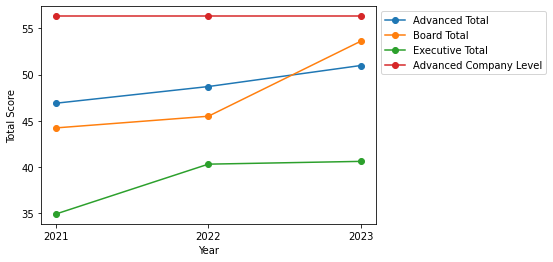

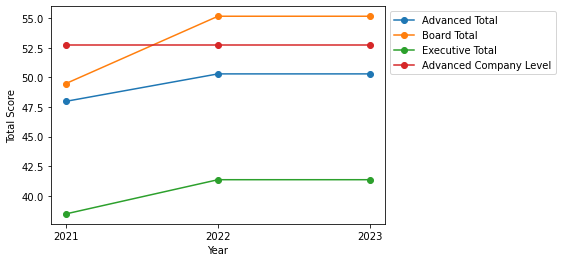

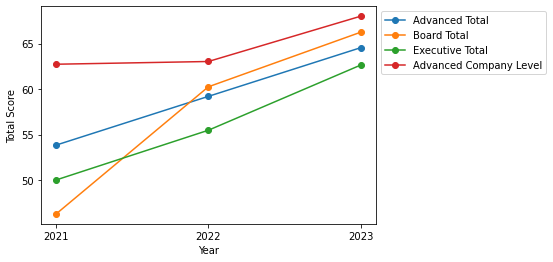

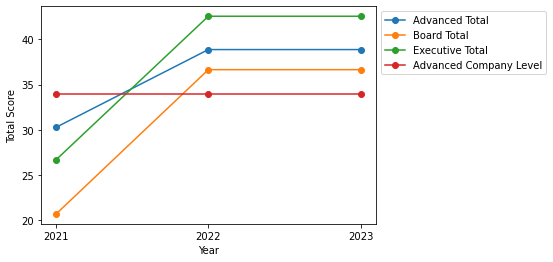

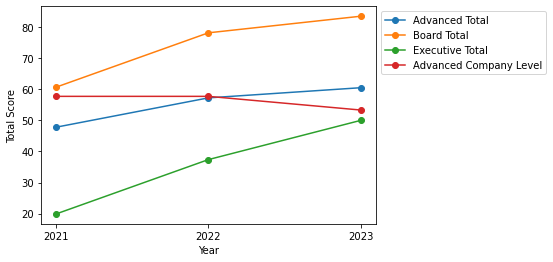

In [105]:
#Visualize the trends of DEI score from 2021-2023 of randomly chosen companies
for i in np.arange(1, 501, 100):
    x1 = np.array(['2021','2022','2023'])
    y1 = df.loc[i, ['Advanced Total (2021)','Advanced Total (2022)','Advanced Total (2023)']]
    y2 = df.loc[i, ['Board Total (2021)','Board Total (2022)','Board Total (2023)']]
    y3 = df.loc[i, ['Executive Total (2021)','Executive Total (2022)','Executive Total (2023)']]
    y4 = df.loc[i, ['Advanced Company Level (2021)','Advanced Company Level (2022)','Advanced Company Level (2023)']]
    plt.plot(x1, y1, marker = 'o', label = 'Advanced Total')
    plt.plot(x1, y2, marker = 'o', label = 'Board Total')
    plt.plot(x1, y3, marker = 'o', label = 'Executive Total')
    plt.plot(x1, y4, marker = 'o', label = 'Advanced Company Level')
    plt.xlabel('Year')
    plt.ylabel('Total Score')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

Based on the five randomly chosen companies results, it shows that their DEI scores are **increasing** from 2021 to 2023 in most parts.

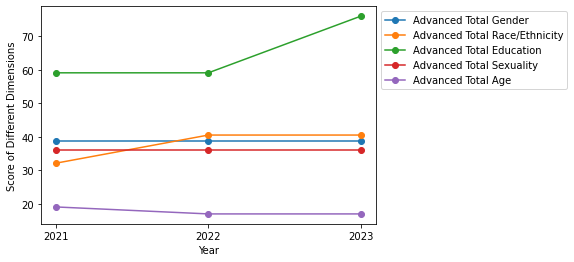

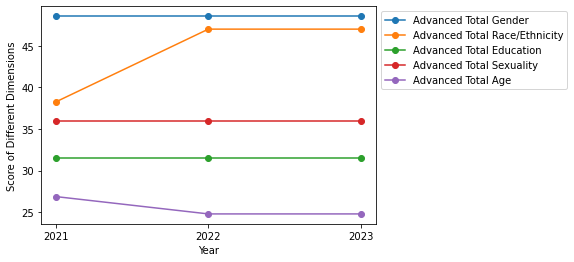

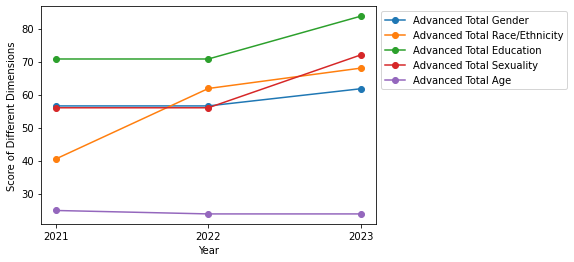

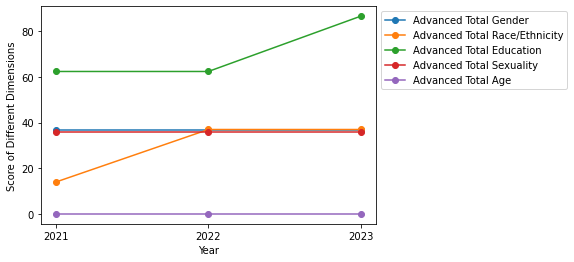

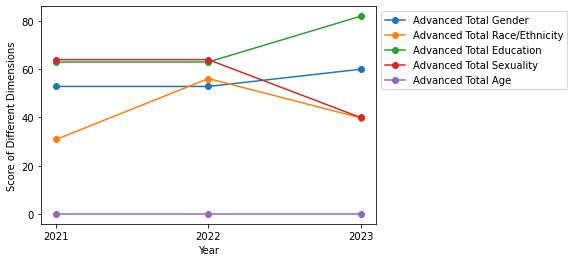

In [116]:
#Visualize the trends of DEI score in different dimensions from 2021-2023 of randomly chosen companies
for i in np.arange(1, 501, 100):
    x1 = np.array(['2021','2022','2023'])
    y1 = df.loc[i, ['Advanced Total Gender (2021)','Advanced Total Gender (2022)','Advanced Total Gender (2023)']]
    y2 = df.loc[i, ['Advanced Total Race/Ethnicity (2021)','Advanced Total Race/Ethnicity (2022)','Advanced Total Race/Ethnicity (2023)']]
    y3 = df.loc[i, ['Advanced Total Education (2021)','Advanced Total Education (2022)','Advanced Total Education (2023)']]
    y4 = df.loc[i, ['Advanced Total Sexuality (2021)','Advanced Total Sexuality (2022)','Advanced Total Sexuality (2023)']]
    y5 = df.loc[i, ['Advanced Total Age (2021)','Advanced Total Age (2022)','Advanced Total Age (2023)']]
    plt.plot(x1, y1, marker = 'o', label = 'Advanced Total Gender')
    plt.plot(x1, y2, marker = 'o', label = 'Advanced Total Race/Ethnicity')
    plt.plot(x1, y3, marker = 'o', label = 'Advanced Total Education')
    plt.plot(x1, y4, marker = 'o', label = 'Advanced Total Sexuality')
    plt.plot(x1, y5, marker = 'o', label = 'Advanced Total Age')
    plt.xlabel('Year')
    plt.ylabel('Score of Different Dimensions')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

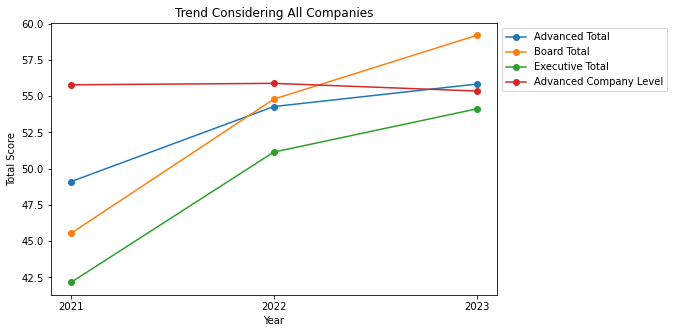

In [115]:
#Visualize the trends of average DEI score level from 2021-2023 of all companies
x1 = np.array(['2021','2022','2023'])
advanced_total = ['Advanced Total (2021)', 'Advanced Total (2022)', 'Advanced Total (2023)']
y1 = np.array([df[i].median() for i in advanced_total])
board_total = ['Board Total (2021)', 'Board Total (2022)', 'Board Total (2023)']
y2 = np.array([df[i].median() for i in board_total])
executive_total = ['Executive Total (2021)', 'Executive Total (2022)', 'Executive Total (2023)']
y3 = np.array([df[i].median() for i in executive_total])
company_level = ['Advanced Company Level (2021)', 'Advanced Company Level (2022)', 'Advanced Company Level (2023)']
y4 = np.array([df[i].median() for i in company_level])
plt.figure(figsize=(8, 5))
plt.plot(x1, y1, marker = 'o', label = 'Advanced Total')
plt.plot(x1, y2, marker = 'o', label = 'Board Total')
plt.plot(x1, y3, marker = 'o', label = 'Executive Total')
plt.plot(x1, y4, marker = 'o', label = 'Advanced Company Level')
plt.xlabel('Year')
plt.ylabel('Total Score')
plt.title('Trend Considering All Companies')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

The average DEI score levels in aspects of advnaced total, board total, and executive total are **increasing** from 2021-2023. The average DEI score level in the company level is slightly **decreasing**. 

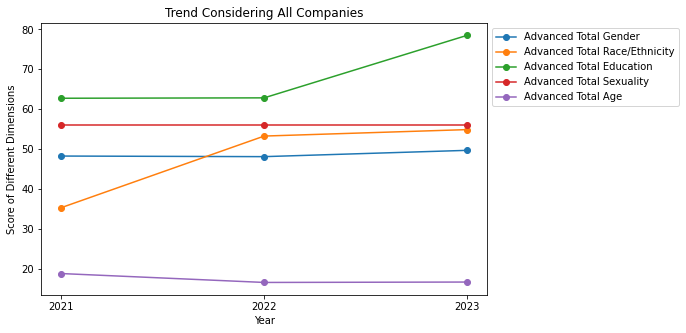

In [117]:
#Visualize the trends of average DEI score level among different dimensions from 2021-2023 of all companies
x1 = np.array(['2021','2022','2023'])
gender = ['Advanced Total Gender (2021)','Advanced Total Gender (2022)','Advanced Total Gender (2023)']
y1 = np.array([df[i].median() for i in gender])
race = ['Advanced Total Race/Ethnicity (2021)','Advanced Total Race/Ethnicity (2022)','Advanced Total Race/Ethnicity (2023)']
y2 = np.array([df[i].median() for i in race])
education = ['Advanced Total Education (2021)','Advanced Total Education (2022)','Advanced Total Education (2023)']
y3 = np.array([df[i].median() for i in education])
sexuality = ['Advanced Total Sexuality (2021)','Advanced Total Sexuality (2022)','Advanced Total Sexuality (2023)']
y4 = np.array([df[i].median() for i in sexuality])
age = ['Advanced Total Age (2021)','Advanced Total Age (2022)','Advanced Total Age (2023)']
y5 = np.array([df[i].median() for i in age])
plt.figure(figsize=(8, 5))
plt.plot(x1, y1, marker = 'o', label = 'Advanced Total Gender')
plt.plot(x1, y2, marker = 'o', label = 'Advanced Total Race/Ethnicity')
plt.plot(x1, y3, marker = 'o', label = 'Advanced Total Education')
plt.plot(x1, y4, marker = 'o', label = 'Advanced Total Sexuality')
plt.plot(x1, y5, marker = 'o', label = 'Advanced Total Age')
plt.xlabel('Year')
plt.ylabel('Score of Different Dimensions')
plt.title('Trend Considering All Companies')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

The average DEI score levels in the dimensions of **race/ethnicity and education are increasing** from 2021-2023. The other three dimentions are almost keeping the same.

## 3. Correlation Analysis

In [157]:
#Find the correlation between the DEI gender score and different measures
df_gender = df[['Advanced Total Gender (2023)','Board Gender Score (2023)','Executive Gender Score (2023)',
                'CEO a Woman (2023)','Chair a Woman (2023)','Board Woman Ratio - calculated (2023)',
                'Executives Woman Ratio - calculated (2023)','% woman employees (2023)']]
df_gender['% woman employees (2023)']=df['% woman employees (2023)'].replace(to_replace='U/A',value=np.nan)
df_gender = df_gender.replace({'CEO a Woman (2023)':{'Yes':1,'No':0}}|{'Chair a Woman (2023)':{'Yes':1,'No':0}})
df_gender = df_gender.dropna()
corr_matrix = df_gender.corr()
corr_matrix[(abs(corr_matrix) > 0.5)&(abs(corr_matrix) < 1)]

/var/folders/3k/j10ggy9x48lfnss8qw330t6c0000gn/T/ipykernel_38583/4084358358.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender['% woman employees (2023)']=df['% woman employees (2023)'].replace(to_replace='U/A',value=np.nan)


,Advanced Total Gender (2023),Board Gender Score (2023),Executive Gender Score (2023),CEO a Woman (2023),Chair a Woman (2023),Board Woman Ratio - calculated (2023),Executives Woman Ratio - calculated (2023),% woman employees (2023)
Advanced Total Gender (2023),NaN,0.631416,0.835543,NaN,NaN,0.619457,0.826008,NaN
Board Gender Score (2023),0.631416,NaN,NaN,NaN,NaN,0.960571,NaN,NaN
Executive Gender Score (2023),0.835543,NaN,NaN,NaN,NaN,NaN,0.980172,NaN
CEO a Woman (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chair a Woman (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Board Woman Ratio - calculated (2023),0.619457,0.960571,NaN,NaN,NaN,NaN,NaN,NaN
Executives Woman Ratio - calculated (2023),0.826008,NaN,0.980172,NaN,NaN,NaN,NaN,NaN
% woman employees (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Board Gender Score and Executive Gender Score are **highly correlated** with Board Woman Ratio - calculated  and Executives Woman Ratio - calculated, respectively.

In [151]:
df.columns.get_loc('Board Race/Ethnicity Score (2023)')

18

In [148]:
df.columns.get_loc('CEO a Racial Minority (2023)')

22

In [142]:
df.columns.get_loc('% black board - calculated (2023)')

28

In [143]:
df.columns.get_loc('% indigenous executives - calculated (2023)')

37

In [158]:
#Find the correlation between the DEI race/ethnicity score and different measures
df_race = df.iloc[:, np.r_[18, 20, 22, 23, 28:37]]
df_race = df_race.replace({'CEO a Racial Minority (2023)':{'Yes':1,'No':0}}|{'Chair a Racial Minority (2023)':{'Yes':1,'No':0}})
corr_matrix = df_race.corr()
corr_matrix[(abs(corr_matrix) > 0.5)&(abs(corr_matrix) < 1)]

,Board Race/Ethnicity Score (2023),Executive Race/Ethnicity Score (2023),CEO a Racial Minority (2023),Chair a Racial Minority (2023),% black board - calculated (2023),% asian board - calculated (2023),% hispanic board - calculated (2023),% caucasian board - calculated (2023),% indigenous board - calculated (2023),% black executives - calculated (2023),% asian executives - calculated (2023),% hispanic executives - calculated (2023),% caucasian executives - calculated (2023)
Board Race/Ethnicity Score (2023),NaN,NaN,NaN,NaN,NaN,-0.539470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Executive Race/Ethnicity Score (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CEO a Racial Minority (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chair a Racial Minority (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% black board - calculated (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% asian board - calculated (2023),-0.53947,NaN,NaN,NaN,NaN,NaN,NaN,-0.573902,NaN,NaN,NaN,NaN,NaN
% hispanic board - calculated (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% caucasian board - calculated (2023),NaN,NaN,NaN,NaN,NaN,-0.573902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% indigenous board - calculated (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% black executives - calculated (2023),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are not highly correlation between the DEI race/ethnicity score and any specific measure. The potential reason may be that these measures are considered together when calculating the score. However, there are two interesting findings. The % asian board - calculated is **negatively correlated** with Board Race/Ethnicity Score. Also, the % asian board and the % asian executives are **negatively correlated** with % caucasian board and % caucasian executives, respectively. 